# Lab 1: Exploring Table Data

## 1. Business Understanding

Mining activity has always posed a potential risk to the miners as a result of seismic activity, these risks are often referred to as mining hazards. It is difficult to detect these types of natural hazards, but due to advancements in technology with seismic/seismoacoustic monitoring we are better able to predict these events. 

This data set recorded the energy of seismic bumps in a Polish coal mine in 2013 and it was uploaded to the UCI Machine Learning Repository. It consists of 2584 instances with 19 multivariate attributes, composed of numeric and categorical types. 

Utilizing this data with machine learning models will enable scientists and other professionals to predict, as accurately as possible, hazardous seismic activity before it occurs, which will potentially save lives. Mining companies would benefit from this tool by being able to predict these events and put procedures into place to safely evacuate employees from a hazardous area. 

Link to the dataset: https://archive.ics.uci.edu/dataset/266/seismic+bumps

## 2. Data Understanding

### 2.1 Data Types

In [39]:
import pandas as pd
import numpy as np
from scipy.io import arff

data = arff.loadarff('data/seismic-bumps.arff')

df = pd.DataFrame(data[0])

# Convert the byte strings to normal strings
df['seismic'] = df['seismic'].str.decode('utf-8')
df['seismoacoustic'] = df['seismoacoustic'].str.decode('utf-8')
df['shift'] = df['shift'].str.decode('utf-8')
df['ghazard'] = df['ghazard'].str.decode('utf-8')
df['class'] = df['class'].str.decode('utf-8')

df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Originally the object type columns were stored as byte strings, for example, b'a'. Using the decode function this extra 'b' was removed

In [40]:
df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seismic         2584 non-null   object 
 1   seismoacoustic  2584 non-null   object 
 2   shift           2584 non-null   object 
 3   genergy         2584 non-null   float64
 4   gpuls           2584 non-null   float64
 5   gdenergy        2584 non-null   float64
 6   gdpuls          2584 non-null   float64
 7   ghazard         2584 non-null   object 
 8   nbumps          2584 non-null   float64
 9   nbumps2         2584 non-null   float64
 10  nbumps3         2584 non-null   float64
 11  nbumps4         2584 non-null   float64
 12  nbumps5         2584 non-null   float64
 13  nbumps6         2584 non-null   float64
 14  nbumps7         2584 non-null   float64
 15  nbumps89        2584 non-null   float64
 16  energy          2584 non-null   float64
 17  maxenergy       2584 non-null   f

*- explain data types for the attributes*

### 2.2 Data Quality

As per the above dataframe information, each attribute has 2584 entries, which is the length of the dataset. This indicates there is no missing data, and based on the description of the dataframe there do not appear to be any extreme outliers. Due to the nature of the data, it is necessary to include seemingly outlier data points, such as high values in seismic energy or number of pulses that are expected during hazardous events which is what we are trying to predict. There are also instances such as in *nbumps* where it is acceptable to have a zero value since it is important to note both the presence and absence of seismic bumps. 

<Axes: >

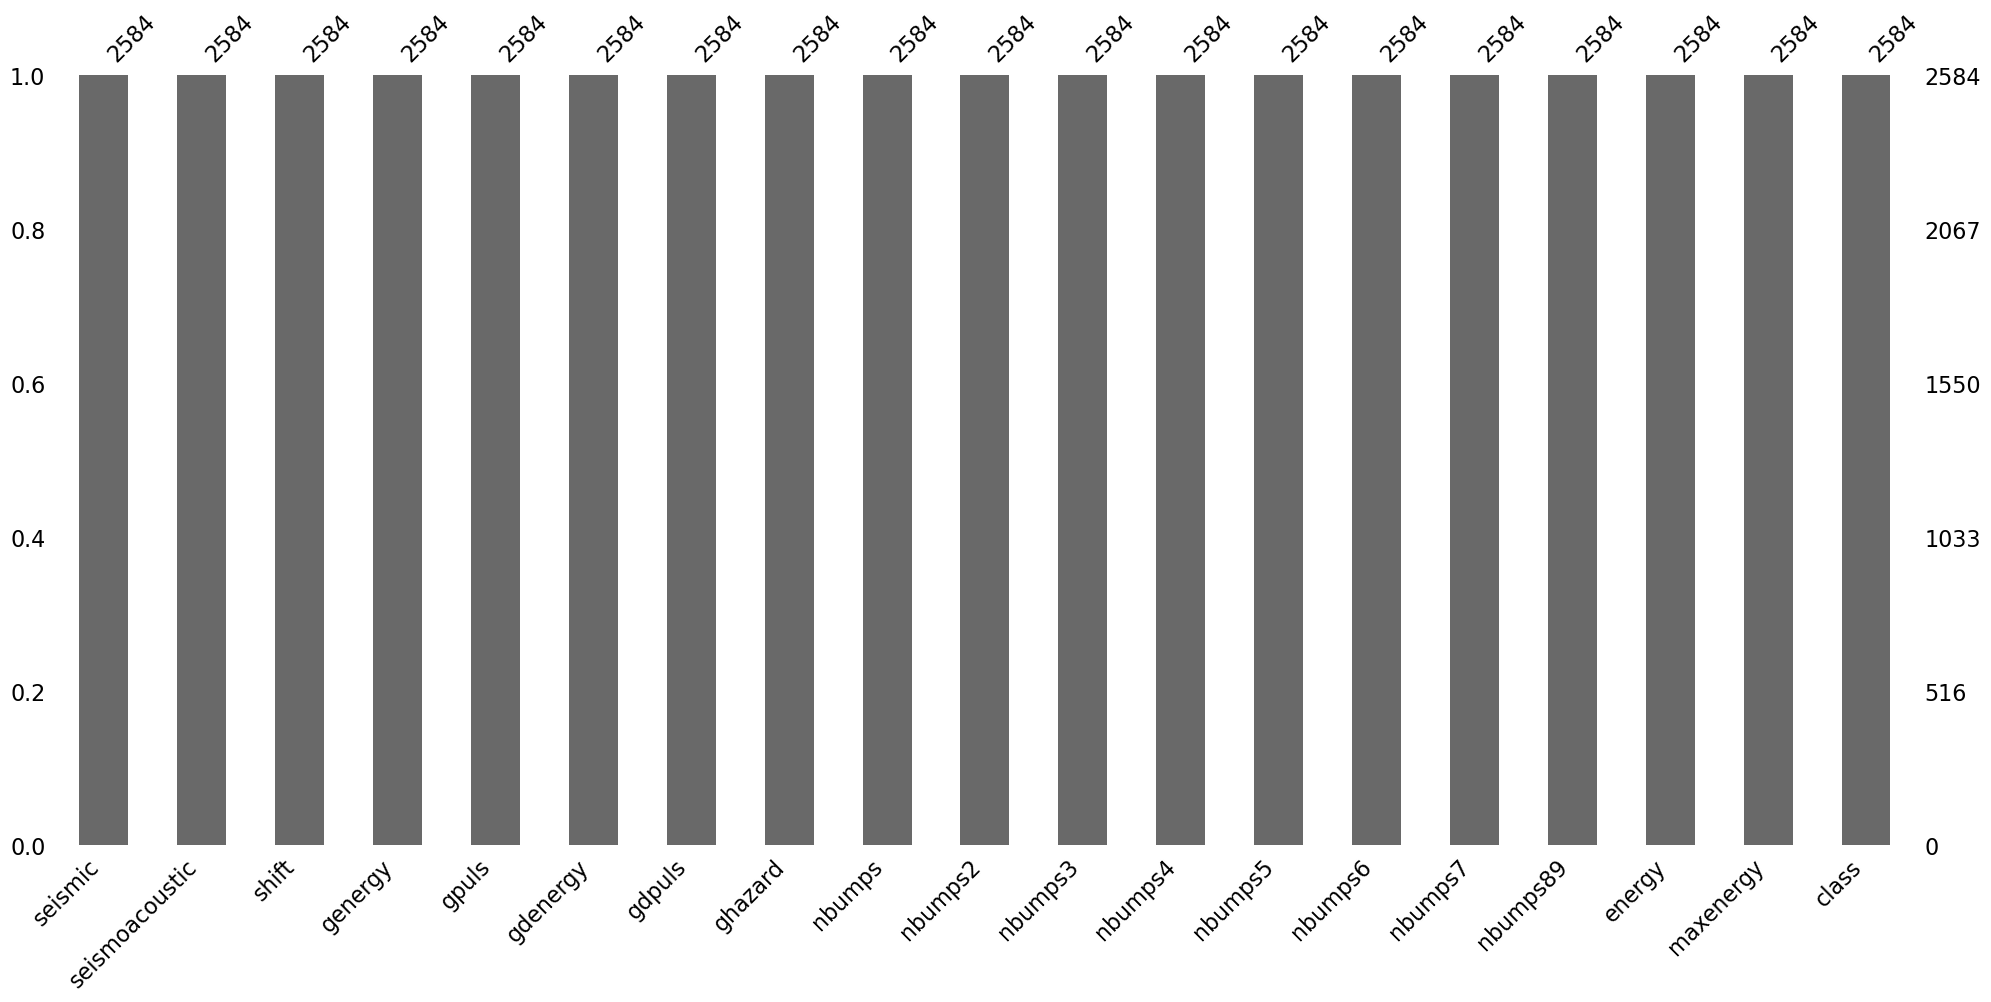

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import missingno as mn

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

mn.bar(df)

In [43]:
# double checking for missing data
print ("===Missing Data===")
print(df.isnull().sum())

# check for duplicates
print("===Duplicate Data===")
print(df.duplicated().sum())

===Missing Data===
seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64
===Duplicate Data===
6


In [44]:
# show duplicate rows
print("===Duplicate Rows===")
print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())

===Duplicate Rows===
     seismic seismoacoustic shift  genergy  gpuls  gdenergy  gdpuls ghazard  \
1015       a              a     N    590.0   11.0     -74.0   -72.0       a   
1017       a              a     N    590.0   11.0     -74.0   -72.0       a   
1016       a              a     N   3720.0   43.0      75.0     8.0       a   
1018       a              a     N   3720.0   43.0      75.0     8.0       a   
87         a              a     N  63550.0  325.0      15.0    35.0       a   

      nbumps  nbumps2  nbumps3  nbumps4  nbumps5  nbumps6  nbumps7  nbumps89  \
1015     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1017     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1016     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1018     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
87       0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

      energy  maxenergy

*- explain duplicates*

## 3. Data Visualization


### 3.1 Feature Distributions


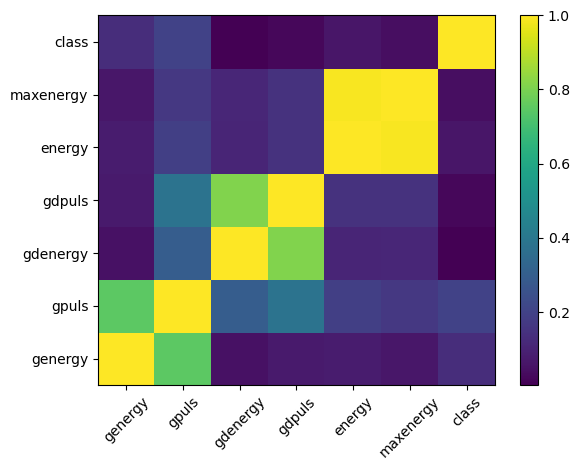

In [45]:
# make correlation matrix

variables = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy', 'class']
plt.pcolor(df[variables].corr())

plt.yticks(np.arange(.5, len(variables), 1), variables, fontsize=10)
plt.xticks(np.arange(.5, len(variables), 1), variables, rotation=45, fontsize=10)
plt.colorbar()
plt.show()

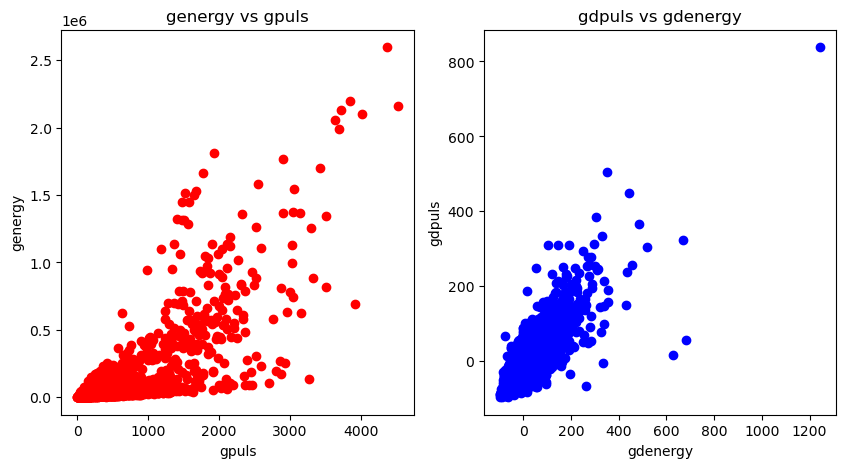

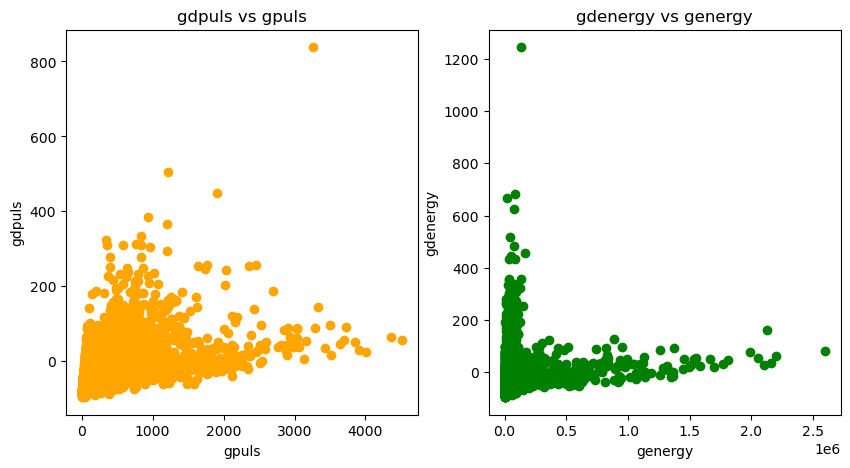

In [46]:
# illustrate relationship between gpuls and genergy

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(df['gpuls'], df['genergy'], color='red')
ax[0].set_xlabel('gpuls')
ax[0].set_ylabel('genergy')
ax[0].title.set_text('genergy vs gpuls')

ax[1].scatter(df['gdenergy'], df['gdpuls'], color='blue')
ax[1].set_xlabel('gdenergy')
ax[1].set_ylabel('gdpuls')
ax[1].title.set_text('gdpuls vs gdenergy')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(df['gpuls'], df['gdpuls'], color='orange')
ax[0].set_xlabel('gpuls')
ax[0].set_ylabel('gdpuls')
ax[0].title.set_text('gdpuls vs gpuls')

ax[1].scatter(df['genergy'], df['gdenergy'], color='green')
ax[1].set_xlabel('genergy')
ax[1].set_ylabel('gdenergy')
ax[1].title.set_text('gdenergy vs genergy')

plt.show()


<Axes: >

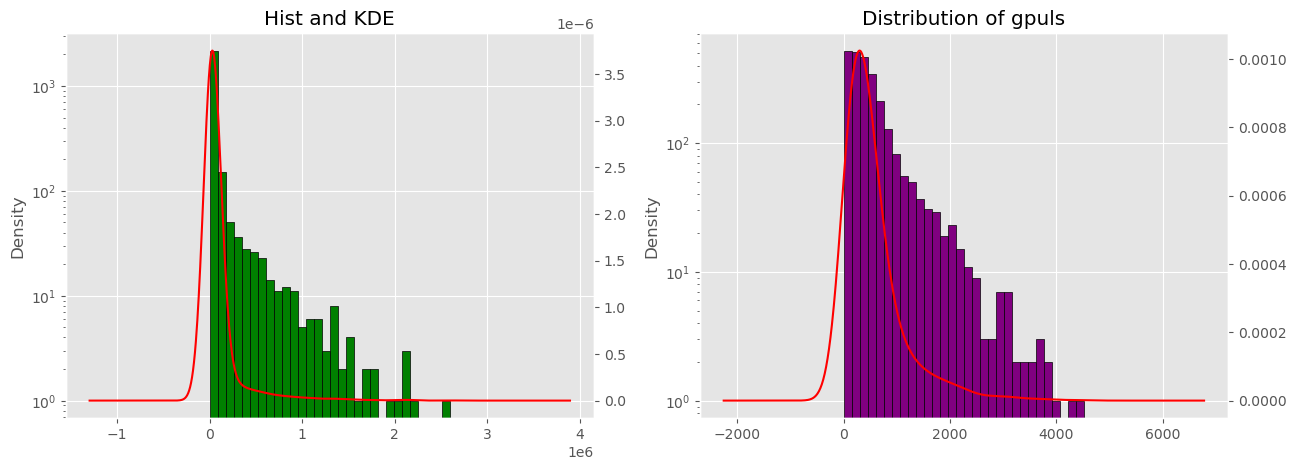

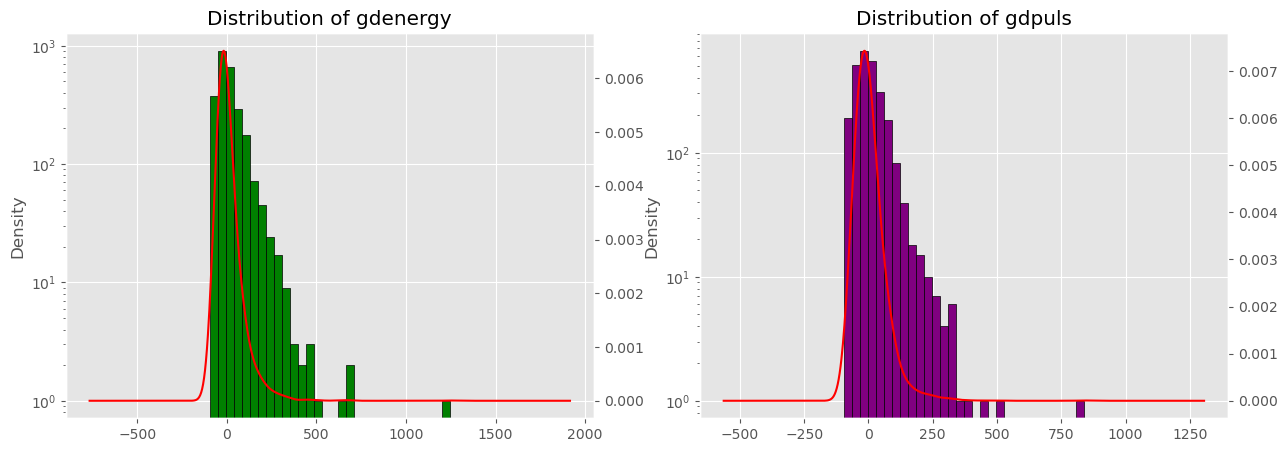

In [47]:
plt.style.use('ggplot')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df.genergy.plot.hist(bins=30, facecolor='green', edgecolor='black', title='Hist and KDE', logy=True)
df.genergy.plot.kde(bw_method=0.4, secondary_y=True, color='red')

plt.subplot(1,2,2)
df.gpuls.plot.hist(bins=30, facecolor='purple', edgecolor='black', title='Distribution of gpuls', logy=True)
df.gpuls.plot.kde(bw_method=0.4, secondary_y=True, color='red')


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df.gdenergy.plot.hist(bins=30, facecolor='green', edgecolor='black', title='Distribution of gdenergy', logy=True)
df.gdenergy.plot.kde(bw_method=0.4, secondary_y=True, color='red')

plt.subplot(1,2,2)
df.gdpuls.plot.hist(bins=30, facecolor='purple', edgecolor='black', title='Distribution of gdpuls', logy=True)
df.gdpuls.plot.kde(bw_method=0.4, secondary_y=True, color='red')

In [48]:
#code here

## 4. UMAP Dimensionality Reduction